<a href="https://colab.research.google.com/github/mozey256/OSCAAR/blob/main/chemo_data_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing necessary libraries

In [3]:
!pip install pycaret
!pip install mlflow
!pip install pandas-profiling
!pip install evidently
!pip install pycaret[mlops]
!pip install gradio
!pip install m2cgen
!pip install pip install autoviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 76.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 15.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 79.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 60.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 6.3

In [2]:
from pycaret.datasets import get_data
from pycaret.classification import *
from sklearn.impute import SimpleImputer
#from pandas_profiling import ProfileReport
import missingno as msno
import mlflow
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## load the data set

In [3]:
chem_data = pd.read_csv('./fillmissing_chemo_data.csv')

In [4]:
chem = chem_data

In [5]:
chem.head()

,NAME,2aminobenzothiazole_conc3_T30,2hydroxyethylhydrazine_conc3_T30,3aminotriazole_conc3_T30,4hydroxytamoxifene_conc3_T30,A23187_conc3_T30,abietic-acid_conc3_T30,acifluorofen-methyl_conc3_T30,aconitine_conc3_T30,agelasine_conc3_T30,...,thiabendazole_conc3_T30,thozonium-bromide_conc3_T30,tomatine_conc3_T30,trichostatinA_conc3_T30,trimethoprim_conc3_T30,tunicamycin_conc3_T30,usnic-acid_conc3_T30,valinomycin_conc3_T30,verrucarin_conc3_T30,ZnCl2_conc3_T30
0,CNAG_02695,-12.390959,99.463196,-47.518637,-8.810942,4.297480,-17.596990,-11.436236,-10.310285,35.952584,...,-27.897476,34.798421,6.037690,-125.625952,29.129570,70.102756,-17.918227,-2.355947,33.778516,80.812676
1,CNAG_06761,26.735925,-1.900895,18.639025,-229.150985,73.488603,0.910867,-48.800696,-1.171001,-297.873286,...,38.358847,2.335099,14.473617,1.344102,56.453545,-3.168274,-49.071984,-0.713006,-2.688197,-121.099541
2,CNAG_01862,-0.944822,-1.900895,118.536041,-108.495497,117.847484,0.910867,38.534702,-1.171001,-0.236123,...,13.051399,101.798766,-19.548246,1.344102,-24.539292,-194.570508,18.674033,-0.713006,-2.688197,-169.371448
3,CNAG_03664,-29.498142,-72.341975,-110.532908,34.647391,-88.657068,11.595300,-20.262663,-14.025310,37.577135,...,29.391496,-38.587139,-92.325338,-67.183398,-15.017046,-44.875864,76.052004,-142.573033,-24.080345,-105.019880
4,CNAG_01181,-47.704215,123.927046,72.732075,18.603897,-5.247973,27.610765,-37.733011,-35.406175,-3.568782,...,-1.641310,-1.832095,-54.107417,86.496364,-22.360077,40.110359,-3.459980,-33.460913,34.692855,6.887958


In [6]:
# Remove the '_conc3_T30' extension from column names
chem.columns = chem.columns.str.replace('_conc3_T30', '')

# Save the modified DataFrame back to a CSV file
chem.to_csv('modified_file.csv', index=False)

In [7]:
#load the modified data

mdata = pd.read_csv('/content/modified_file.csv')

In [8]:
mdata.head()

,NAME,2aminobenzothiazole,2hydroxyethylhydrazine,3aminotriazole,4hydroxytamoxifene,A23187,abietic-acid,acifluorofen-methyl,aconitine,agelasine,...,thiabendazole,thozonium-bromide,tomatine,trichostatinA,trimethoprim,tunicamycin,usnic-acid,valinomycin,verrucarin,ZnCl2
0,CNAG_02695,-12.390959,99.463196,-47.518637,-8.810942,4.297480,-17.596990,-11.436236,-10.310285,35.952584,...,-27.897476,34.798421,6.037690,-125.625952,29.129570,70.102756,-17.918227,-2.355947,33.778516,80.812676
1,CNAG_06761,26.735925,-1.900895,18.639025,-229.150985,73.488603,0.910867,-48.800696,-1.171001,-297.873286,...,38.358847,2.335099,14.473617,1.344102,56.453545,-3.168274,-49.071984,-0.713006,-2.688197,-121.099541
2,CNAG_01862,-0.944822,-1.900895,118.536041,-108.495497,117.847484,0.910867,38.534702,-1.171001,-0.236123,...,13.051399,101.798766,-19.548246,1.344102,-24.539292,-194.570508,18.674033,-0.713006,-2.688197,-169.371448
3,CNAG_03664,-29.498142,-72.341975,-110.532908,34.647391,-88.657068,11.595300,-20.262663,-14.025310,37.577135,...,29.391496,-38.587139,-92.325338,-67.183398,-15.017046,-44.875864,76.052004,-142.573033,-24.080345,-105.019880
4,CNAG_01181,-47.704215,123.927046,72.732075,18.603897,-5.247973,27.610765,-37.733011,-35.406175,-3.568782,...,-1.641310,-1.832095,-54.107417,86.496364,-22.360077,40.110359,-3.459980,-33.460913,34.692855,6.887958


In [9]:
mdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1452 entries, 0 to 1451
Columns: 125 entries, NAME to ZnCl2
dtypes: float64(124), object(1)
memory usage: 1.4+ MB


In [10]:
mdata.describe()

,2aminobenzothiazole,2hydroxyethylhydrazine,3aminotriazole,4hydroxytamoxifene,A23187,abietic-acid,acifluorofen-methyl,aconitine,agelasine,alamethicin,...,thiabendazole,thozonium-bromide,tomatine,trichostatinA,trimethoprim,tunicamycin,usnic-acid,valinomycin,verrucarin,ZnCl2
count,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,...,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000
mean,-3.259671,-1.900895,1.927553,-2.586860,0.520220,0.910867,-0.469433,-1.171001,-0.236123,-2.941660,...,-1.329431,-0.102921,-3.095922,1.344102,0.174904,-2.540051,-1.293033,-0.713006,-2.688197,-1.297769
std,33.066458,42.592975,45.769377,28.950207,24.462402,23.882718,24.682649,26.808442,26.848937,27.487302,...,38.943943,21.431140,37.230370,20.672668,26.621270,57.211040,21.412497,30.736464,26.510357,27.502170
min,-371.385938,-425.235728,-395.478995,-400.171641,-198.099914,-376.301691,-400.885844,-437.180055,-365.125912,-210.499068,...,-188.729555,-146.387238,-383.835539,-358.366759,-118.804684,-429.860597,-102.415940,-438.528773,-440.556178,-242.398371
25%,-18.010199,-16.759529,-16.524108,-10.193720,-12.199915,-10.276860,-12.684524,-9.696545,-9.654307,-14.917426,...,-23.847532,-10.599955,-20.897468,-6.853540,-14.375137,-27.515381,-13.127589,-10.997569,-10.404573,-13.126277
50%,-1.819928,-1.793272,2.681695,-0.771282,-0.226330,0.910867,0.163052,-0.364536,1.144236,-2.790993,...,-0.807225,-0.815978,-0.765537,1.344102,1.091212,0.073090,-0.694025,0.806058,0.206643,-0.138352
75%,14.520784,18.090018,21.416787,9.296674,12.425899,12.801467,12.666982,9.837775,11.408326,10.237916,...,22.239602,10.153282,16.999885,8.906759,15.874447,29.160638,10.695728,12.747758,8.947019,11.167245
max,108.770371,223.063183,268.118561,75.530561,118.597040,119.521476,88.409488,142.516313,155.004199,152.066598,...,134.360324,101.798766,154.291009,186.841095,124.446323,321.110502,82.523704,161.446366,134.951335,158.757308


<Axes: >

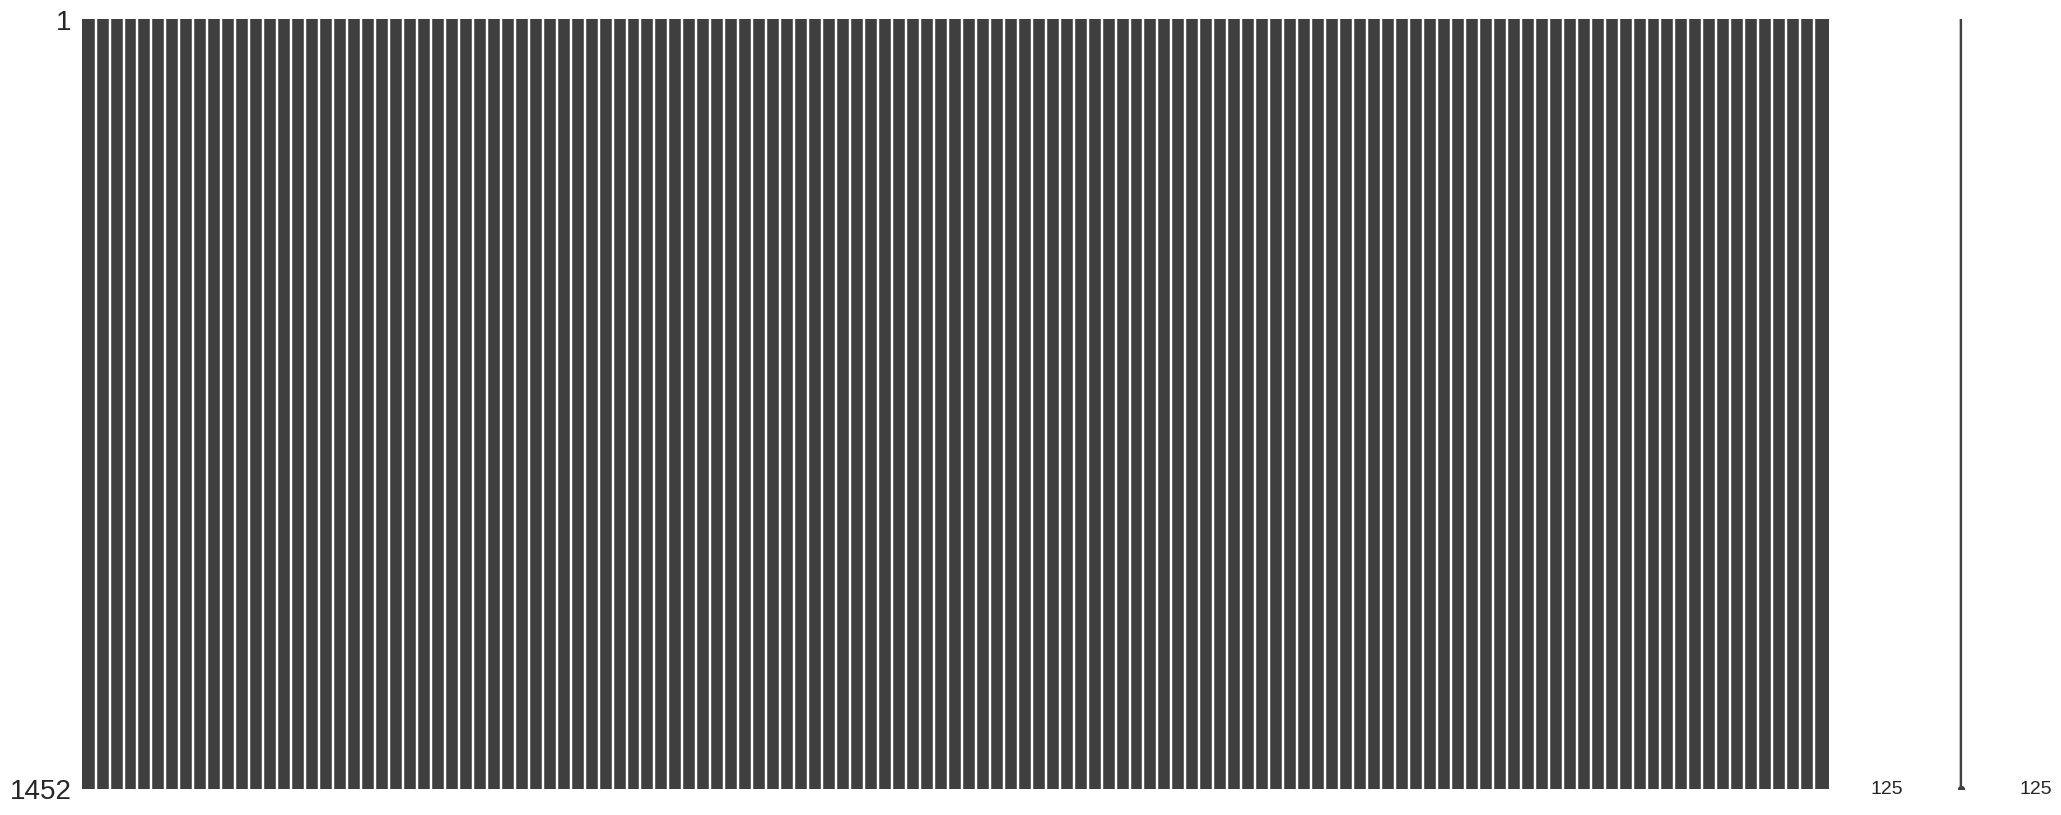

In [11]:
msno.matrix(mdata)

In [12]:
# Check for missing values
print(chem.isnull().sum())

NAME                      0
2aminobenzothiazole       0
2hydroxyethylhydrazine    0
3aminotriazole            0
4hydroxytamoxifene        0
                         ..
tunicamycin               0
usnic-acid                0
valinomycin               0
verrucarin                0
ZnCl2                     0
Length: 125, dtype: int64


In [13]:
mdata.shape

(1452, 125)

In [14]:
mdata["NAME"].value_counts()

CNAG_02695    1
CNAG_04197    1
CNAG_04092    1
CNAG_01372    1
CNAG_04530    1
             ..
CNAG_03173    1
CNAG_04416    1
CNAG_03280    1
CNAG_04943    1
+2.5 stdev    1
Name: NAME, Length: 1452, dtype: int64

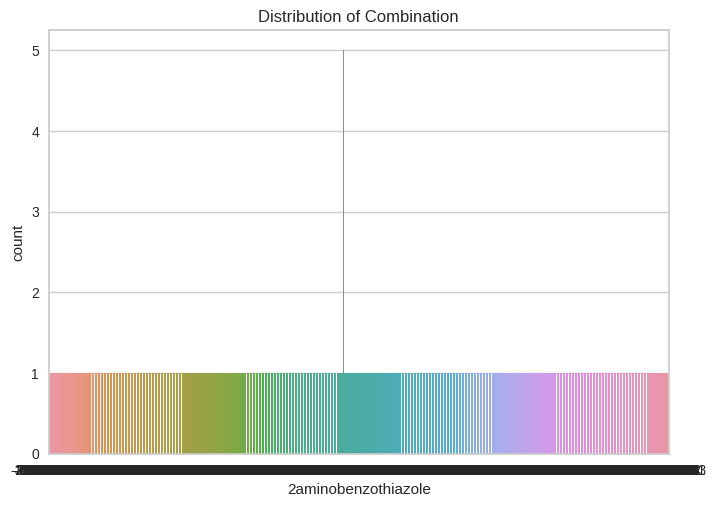

In [15]:
# Distribution of the target variable
sns.countplot(x='2aminobenzothiazole', data=mdata)
plt.title('Distribution of Combination')
plt.show()

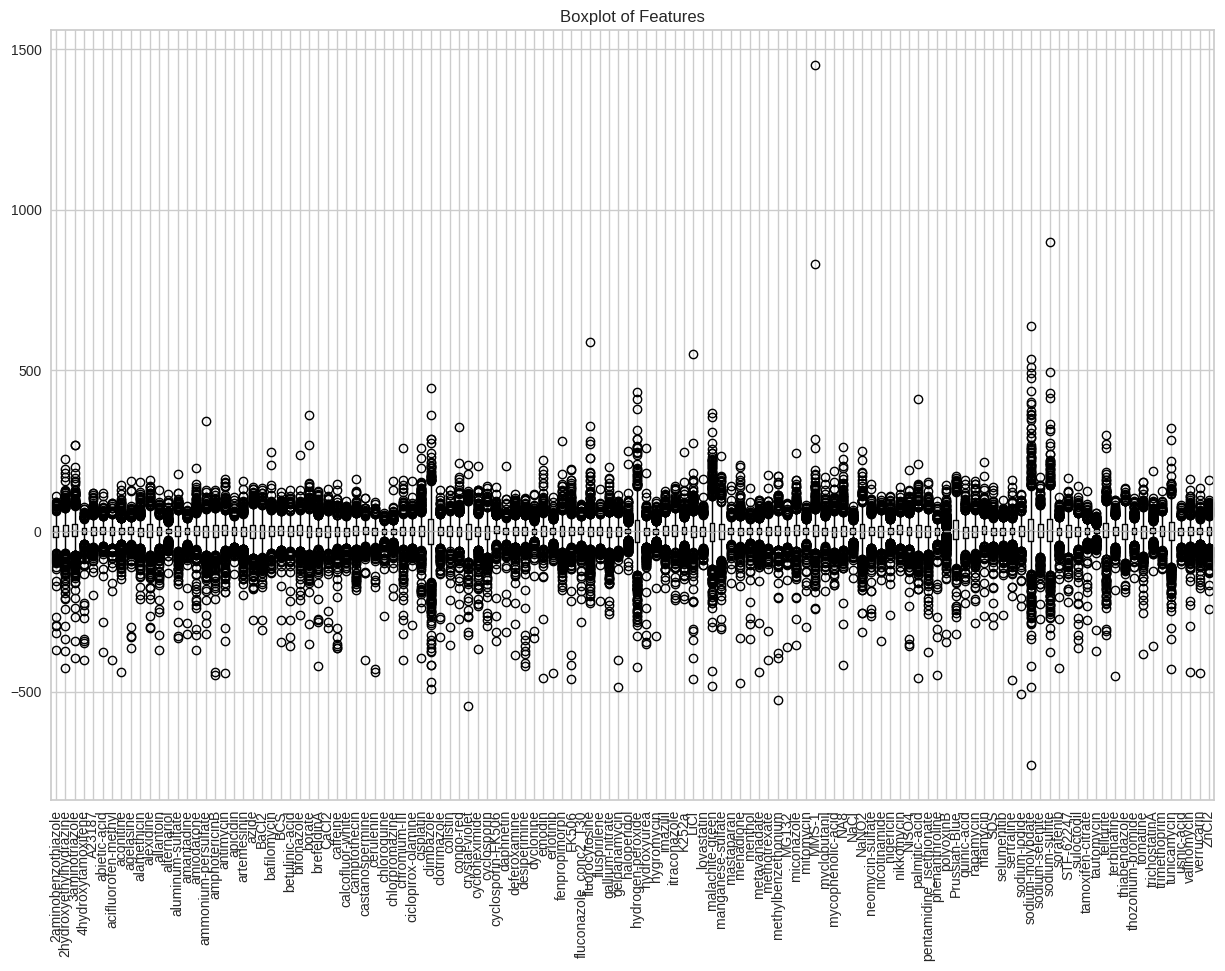

In [16]:
# Boxplot of each feature
chem.boxplot(figsize=(15, 10))
plt.title('Boxplot of Features')
plt.xticks(rotation=90)
plt.show()

In [17]:

# from ydata_profiling import ProfileReport

# profile = ProfileReport(mdata, title="Chemogenomic data")

# profile.to_notebook_iframe()

# profile.to_file("chem_data_report.html")


In [18]:
# Calculate the correlation matrix
correlation_matrix = mdata.corr()

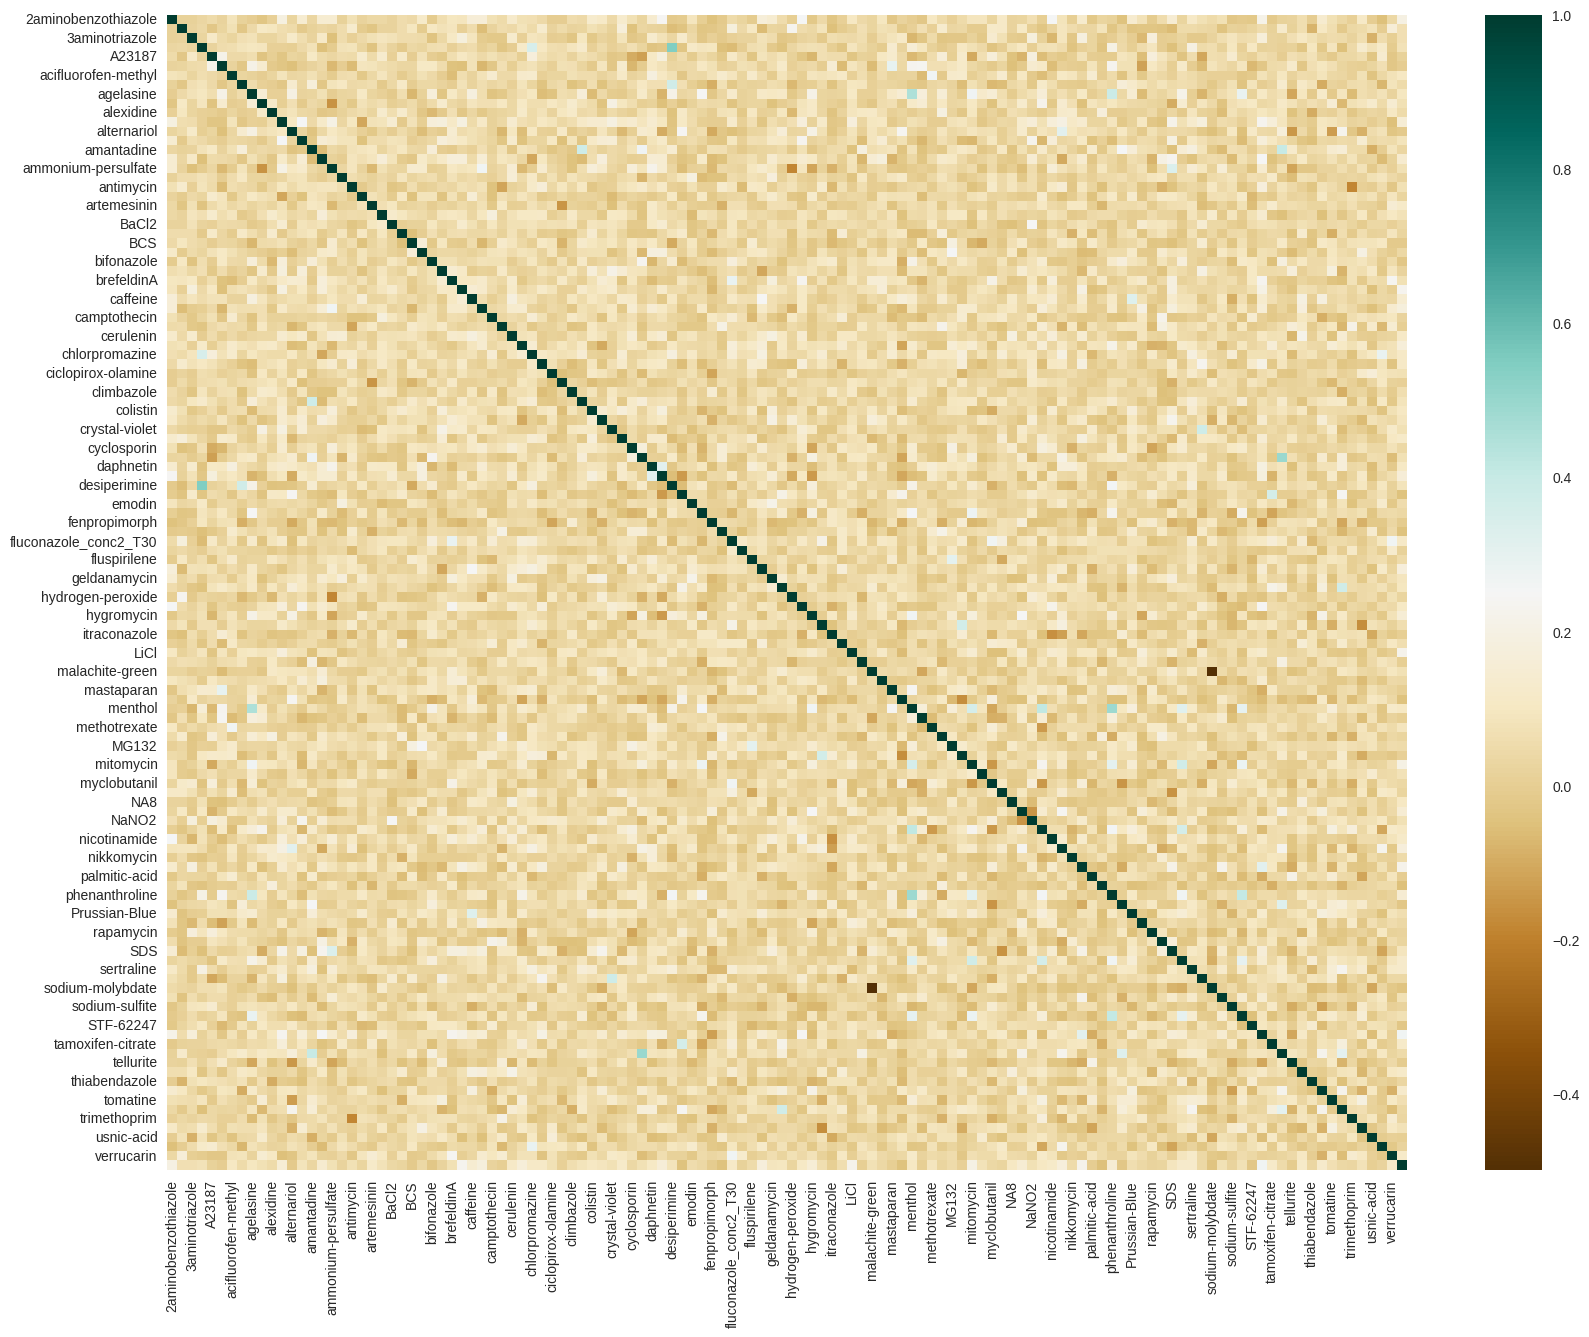

In [21]:
plt.figure(figsize=(20,15))
c = mdata.corr()
sns.heatmap(c,cmap="BrBG",annot=False)

plt.show()


# EDA for the combinationsfrom structural data and chemogenomic data

In [22]:
chem_comb = pd.read_csv('/content/ML_training_data.csv')

In [23]:
chem_comb.head()

,Drug 1,Drug2,Combination,0,1,2,3,4,5,6,...,Joint_Substructure_159,Joint_Substructure_160,Joint_Substructure_161,Joint_Substructure_162,Joint_Substructure_163,Joint_Substructure_164,Joint_Substructure_165,Joint_Substructure_166,Joint_Substructure_167,Synergy
0,2aminobenzothiazole,fluconazole,2aminobenzothiazole+fluconazole,0,0,1,1,1,1,1,...,2,0,0,2,2,2,1,2,0,No
1,2hydroxyethylhydrazine,fluconazole,2hydroxyethylhydrazine+fluconazole,0,0,1,2,1,2,2,...,2,0,0,2,1,1,2,1,0,No
2,3aminotriazole,fluconazole,3aminotriazole+fluconazole,0,1,2,1,1,1,1,...,2,0,0,2,2,1,1,2,0,No
3,4hydroxytamoxifene,fluconazole,4hydroxytamoxifene+fluconazole,1,1,1,1,1,1,1,...,2,1,1,2,2,2,2,2,0,No
4,A23187,fluconazole,A23187+fluconazole,1,1,2,1,1,1,1,...,2,1,1,2,2,2,2,2,0,No


In [24]:
mldata = chem_comb

In [25]:
mldata.describe()

,0,1,2,3,4,5,6,7,8,9,...,Joint_Substructure_158,Joint_Substructure_159,Joint_Substructure_160,Joint_Substructure_161,Joint_Substructure_162,Joint_Substructure_163,Joint_Substructure_164,Joint_Substructure_165,Joint_Substructure_166,Joint_Substructure_167
count,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,...,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000
mean,0.739837,0.349593,0.813008,0.674797,0.642276,1.414634,0.756098,0.739837,0.699187,0.666667,...,1.569106,1.626016,1.178862,1.097561,1.691057,1.032520,1.691057,1.772358,1.747967,0.203252
std,0.655743,0.477814,0.680331,0.625916,0.607841,0.493663,0.661988,0.655743,0.638045,0.621606,...,0.496211,0.484846,0.682523,0.698858,0.463000,0.704909,0.463000,0.420165,0.435065,0.403239
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.250000,0.000000
50%,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
max,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000


In [26]:
mldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Columns: 1622 entries, Drug 1 to Synergy
dtypes: int64(1618), object(4)
memory usage: 3.0+ MB


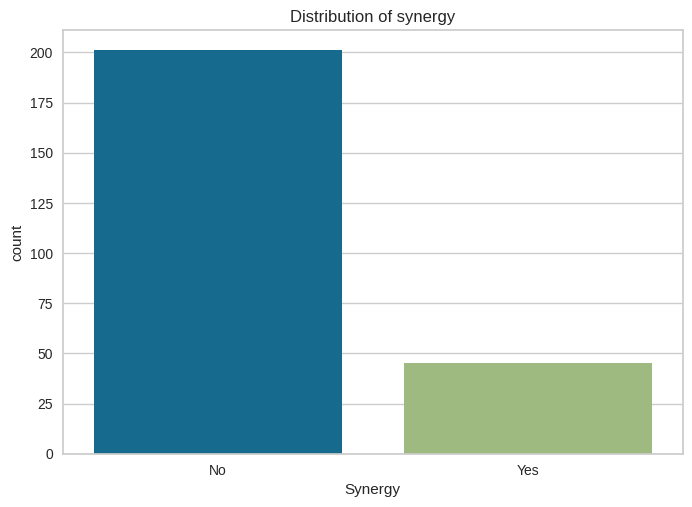

In [27]:
# Distribution of the target variable
sns.countplot(x='Synergy', data=mldata)
plt.title('Distribution of synergy')
plt.show()

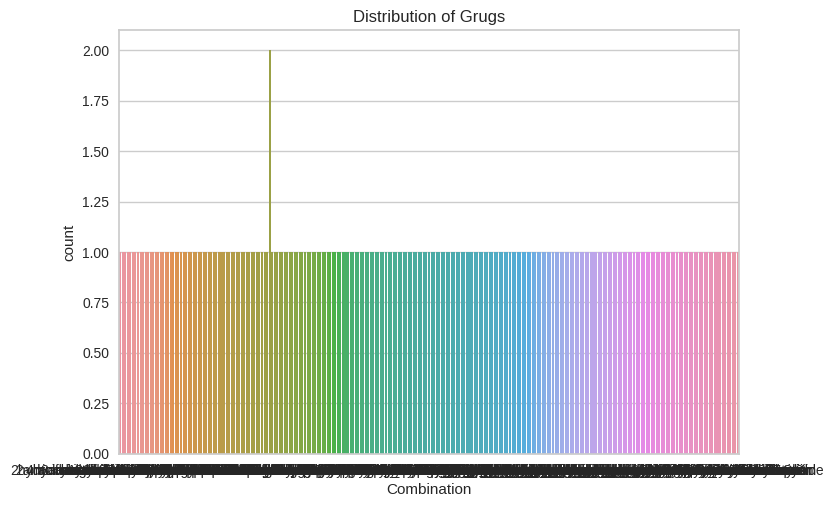

In [28]:
# Distribution of the target variable
sns.countplot(x='Combination', data=mldata)
plt.title('Distribution of Grugs')
plt.show()

In [29]:
mld2 = mldata

In [30]:
# Remove non-numeric columns if necessary
numeric_df = mld2.drop(['Drug 1', 'Drug2', 'Combination', 'Synergy'], axis=1)

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()
print(correlation_matrix)
# # Plot the heatmap
# plt.figure(figsize=(12, 10))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True, linewidths=0.5)
# plt.title('Correlation Matrix Heatmap')
# plt.show()

                               0         1         2         3         4  \
0                       1.000000  0.017899 -0.539502 -0.624647 -0.664534   
1                       0.017899  1.000000  0.013577  0.013204  0.024794   
2                      -0.539502  0.013577  1.000000  0.613838  0.577845   
3                      -0.624647  0.013204  0.613838  1.000000  0.701434   
4                      -0.664534  0.024794  0.577845  0.701434  1.000000   
...                          ...       ...       ...       ...       ...   
Joint_Substructure_163 -0.493770  0.002463  0.582968  0.560621  0.579769   
Joint_Substructure_164  0.110610 -0.026400  0.049092  0.018092 -0.046222   
Joint_Substructure_165 -0.067688 -0.049257 -0.035291  0.058800  0.063407   
Joint_Substructure_166  0.069674 -0.045654  0.074555  0.042529 -0.049064   
Joint_Substructure_167 -0.030747  0.095760 -0.143581 -0.011964 -0.051853   

                               5         6         7         8         9  ...  \
0     

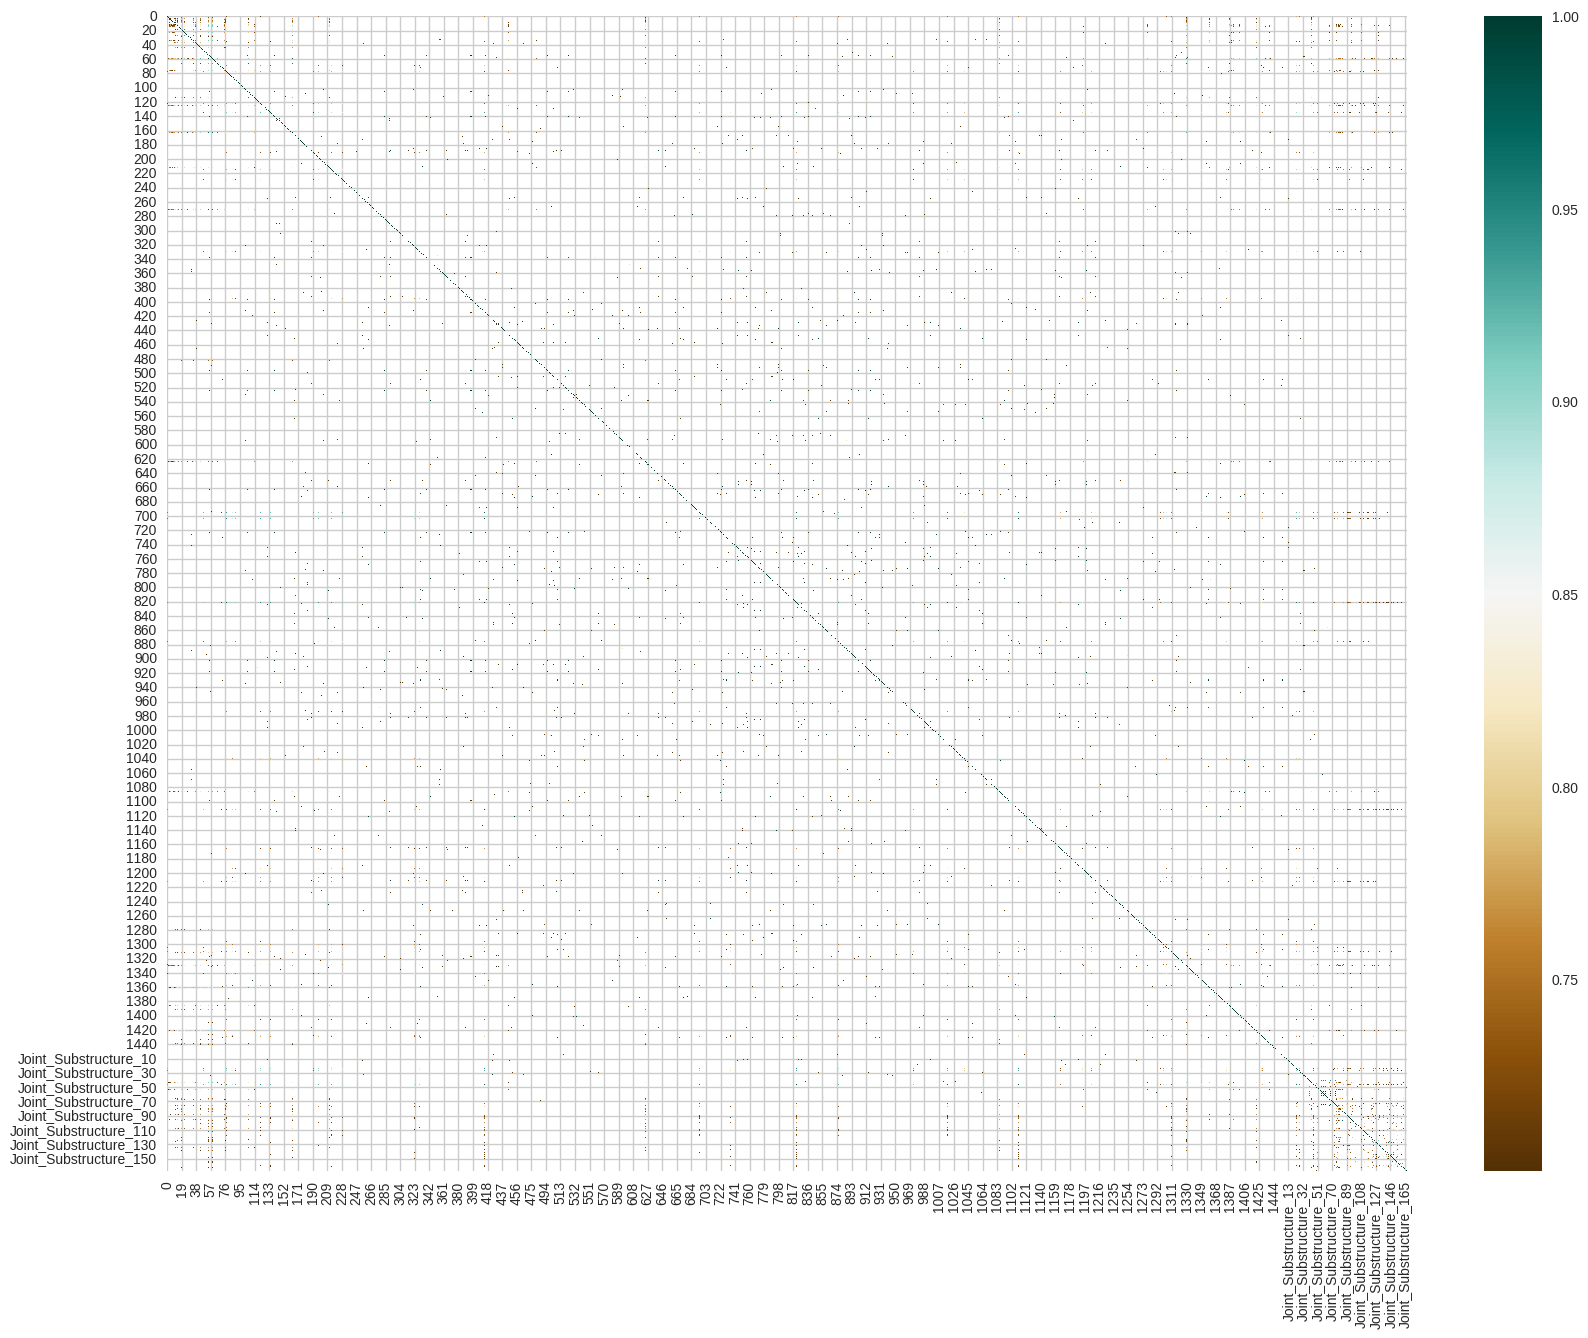

In [31]:
# Remove non-numeric columns if necessary
numeric_df = mld2.drop(['Drug 1', 'Drug2', 'Combination', 'Synergy'], axis=1)

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Filter highly correlated features


plt.figure(figsize=(20,15))
c= correlation_matrix[correlation_matrix >= 0.7]
sns.heatmap(c,cmap="BrBG",annot=False)

plt.show()
# # Plot the heatmap for highly correlated features
# plt.figure(figsize=(12, 10))
# sns.heatmap(highly_correlated_features, annot=False, cmap='coolwarm', square=True, linewidths=0.5)
# plt.title('Highly Correlated Features Heatmap (Correlation >= 0.5)')
# plt.show()

In [32]:


# # Calculate the correlation matrix
# correlation_matrix = numeric_df.corr()
# [37]

# # Select features highly correlated to 50% and above
# high_corr_features = correlation_matrix[correlation_matrix >= 0.5].dropna(axis=1, how='all').columns

# # Plot the heatmap for highly correlated features
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix.loc[high_corr_features, high_corr_features], annot=True, cmap='coolwarm', square=True, linewidths=0.5)
# plt.title('Highly Correlated Features Heatmap (Correlation >= 0.5)')
# plt.show()

In [33]:
mld2.head()

,Drug 1,Drug2,Combination,0,1,2,3,4,5,6,...,Joint_Substructure_159,Joint_Substructure_160,Joint_Substructure_161,Joint_Substructure_162,Joint_Substructure_163,Joint_Substructure_164,Joint_Substructure_165,Joint_Substructure_166,Joint_Substructure_167,Synergy
0,2aminobenzothiazole,fluconazole,2aminobenzothiazole+fluconazole,0,0,1,1,1,1,1,...,2,0,0,2,2,2,1,2,0,No
1,2hydroxyethylhydrazine,fluconazole,2hydroxyethylhydrazine+fluconazole,0,0,1,2,1,2,2,...,2,0,0,2,1,1,2,1,0,No
2,3aminotriazole,fluconazole,3aminotriazole+fluconazole,0,1,2,1,1,1,1,...,2,0,0,2,2,1,1,2,0,No
3,4hydroxytamoxifene,fluconazole,4hydroxytamoxifene+fluconazole,1,1,1,1,1,1,1,...,2,1,1,2,2,2,2,2,0,No
4,A23187,fluconazole,A23187+fluconazole,1,1,2,1,1,1,1,...,2,1,1,2,2,2,2,2,0,No


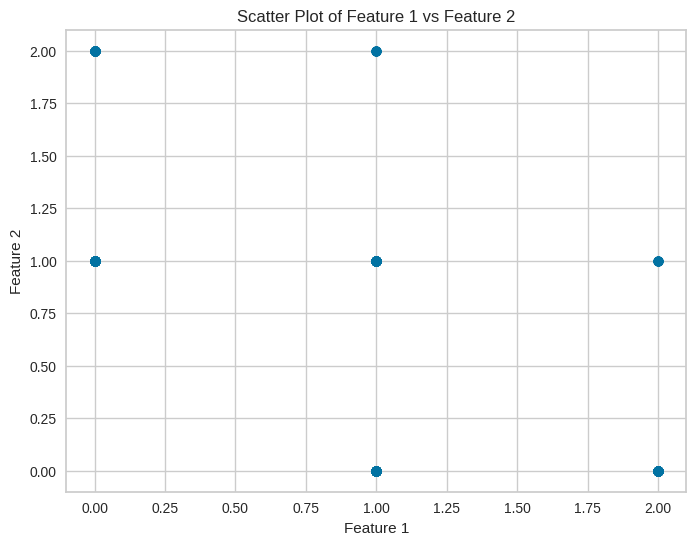

In [34]:
# Scatter plot of two features
plt.figure(figsize=(8, 6))
plt.scatter(mld2['0'], mld2['3'])
plt.title('Scatter Plot of Feature 1 vs Feature 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [37]:
# Correlation matrix
print(mld2.corr())


                               0         1         2         3         4  \
0                       1.000000  0.017899 -0.539502 -0.624647 -0.664534   
1                       0.017899  1.000000  0.013577  0.013204  0.024794   
2                      -0.539502  0.013577  1.000000  0.613838  0.577845   
3                      -0.624647  0.013204  0.613838  1.000000  0.701434   
4                      -0.664534  0.024794  0.577845  0.701434  1.000000   
...                          ...       ...       ...       ...       ...   
Joint_Substructure_163 -0.493770  0.002463  0.582968  0.560621  0.579769   
Joint_Substructure_164  0.110610 -0.026400  0.049092  0.018092 -0.046222   
Joint_Substructure_165 -0.067688 -0.049257 -0.035291  0.058800  0.063407   
Joint_Substructure_166  0.069674 -0.045654  0.074555  0.042529 -0.049064   
Joint_Substructure_167 -0.030747  0.095760 -0.143581 -0.011964 -0.051853   

                               5         6         7         8         9  ...  \
0     

In [41]:
df2 = mld2

In [42]:
# Check for missing values
print(df2.isnull().sum())

Drug 1                    0
Drug2                     0
Combination               0
0                         0
1                         0
                         ..
Joint_Substructure_164    0
Joint_Substructure_165    0
Joint_Substructure_166    0
Joint_Substructure_167    0
Synergy                   0
Length: 1622, dtype: int64


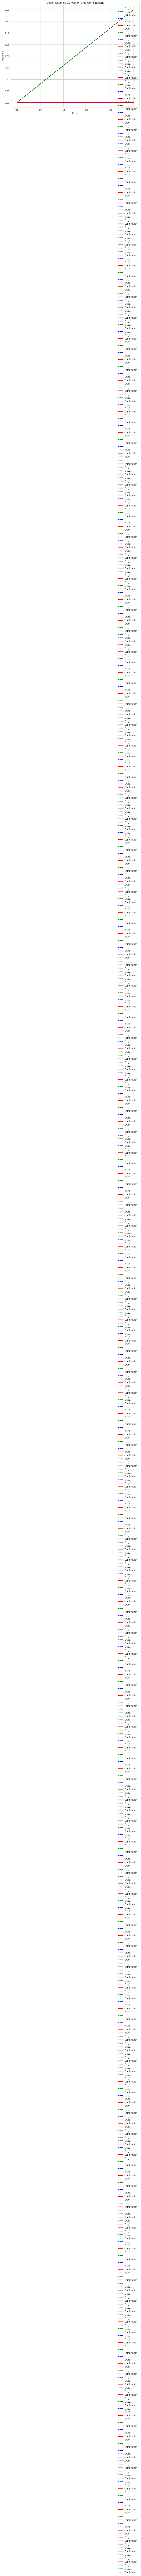

In [44]:
import numpy as np

# Assuming 'Dose' is a column representing the dose of each drug
dose_levels = np.linspace(0, 1, 100)

# Example function to calculate response
def response_function(dose, drug):
    # Example response function
    if drug == 'Drug 1':
        return dose ** 2  # Quadratic response for Drug1
    elif drug == 'Drug2':
        return 2 * dose  # Linear response for Drug2
    else:
        return 0

# Plot dose-response curves for different combinations
plt.figure(figsize=(10, 8))
for index, row in df2.iterrows():
    drug1_response = [response_function(d, 'Drug1') for d in dose_levels]
    drug2_response = [response_function(d, 'Drug2') for d in dose_levels]
    combination_response = [response_function(d, 'Combination') for d in dose_levels]

    plt.plot(dose_levels, drug1_response, label='Drug1', color='blue', linestyle='--')
    plt.plot(dose_levels, drug2_response, label='Drug2', color='green', linestyle='--')
    plt.plot(dose_levels, combination_response, label='Combination', color='red')

plt.title('Dose-Response Curves for Drug Combinations')
plt.xlabel('Dose')
plt.ylabel('Response')
plt.legend()
plt.show()

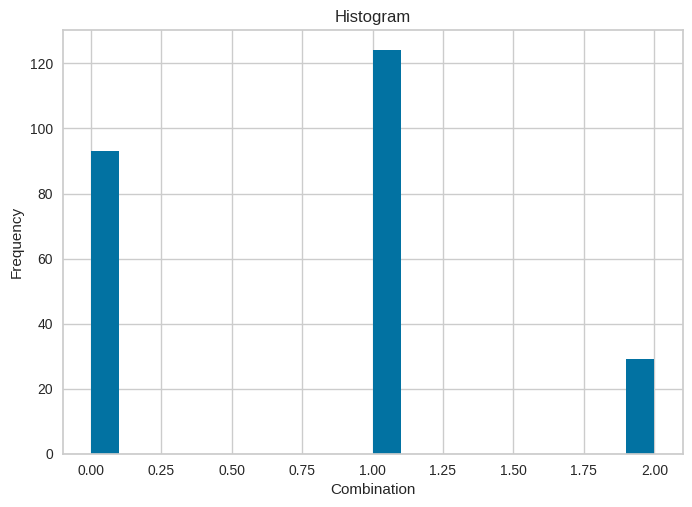

In [49]:
# Histogram of a numeric column
plt.hist(df2['0'], bins=20)
plt.xlabel('Combination')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

# Correlation heatmap
# sns.heatmap(df2.corr(), annot=True, cmap='coolwarm')
# plt.title('Correlation Heatmap')
# plt.show()


In [51]:
df2['Drug_Combination'] = df2['Drug 1'] + '+' + df2['Drug2']


In [ ]:
# Perform one-hot encoding for the 'Synergy' column
df2 = pd.get_dummies(df2, columns=['Synergy'], drop_first=True)

In [57]:
df2.head()

,Drug 1,Drug2,Combination,0,1,2,3,4,5,6,...,Joint_Substructure_160,Joint_Substructure_161,Joint_Substructure_162,Joint_Substructure_163,Joint_Substructure_164,Joint_Substructure_165,Joint_Substructure_166,Joint_Substructure_167,Drug_Combination,Synergy_Yes
0,2aminobenzothiazole,fluconazole,2aminobenzothiazole+fluconazole,0,0,1,1,1,1,1,...,0,0,2,2,2,1,2,0,2aminobenzothiazole+fluconazole,0
1,2hydroxyethylhydrazine,fluconazole,2hydroxyethylhydrazine+fluconazole,0,0,1,2,1,2,2,...,0,0,2,1,1,2,1,0,2hydroxyethylhydrazine+fluconazole,0
2,3aminotriazole,fluconazole,3aminotriazole+fluconazole,0,1,2,1,1,1,1,...,0,0,2,2,1,1,2,0,3aminotriazole+fluconazole,0
3,4hydroxytamoxifene,fluconazole,4hydroxytamoxifene+fluconazole,1,1,1,1,1,1,1,...,1,1,2,2,2,2,2,0,4hydroxytamoxifene+fluconazole,0
4,A23187,fluconazole,A23187+fluconazole,1,1,2,1,1,1,1,...,1,1,2,2,2,2,2,0,A23187+fluconazole,0


In [58]:
average_synergy = df2.groupby('Drug_Combination')['Synergy_Yes'].mean().reset_index()


In [59]:
# Identify promising combinations
best_combinations = average_synergy.sort_values(by='Synergy_Yes', ascending=False)


In [61]:
best_combinations

,Drug_Combination,Synergy_Yes
106,dyclonine+geldanamycin,1.0
160,fluconazole+sertraline,1.0
111,fenpropimorph+fluconazole,1.0
34,alternariol+geldanamycin,1.0
209,geldanamycin+miconazole,1.0
...,...,...
98,cyproconazole+geldanamycin,0.0
99,daphnetin+fluconazole,0.0
100,daphnetin+geldanamycin,0.0
104,desiperimine+geldanamycin,0.0


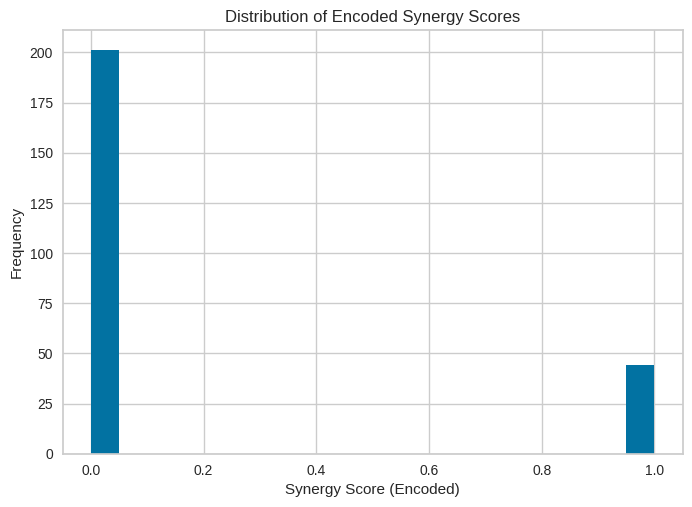

In [66]:
# Further analysis
plt.hist(best_combinations['Synergy_Yes'], bins=20)
plt.xlabel('Synergy Score (Encoded)')
plt.ylabel('Frequency')
plt.title('Distribution of Encoded Synergy Scores')
plt.show()

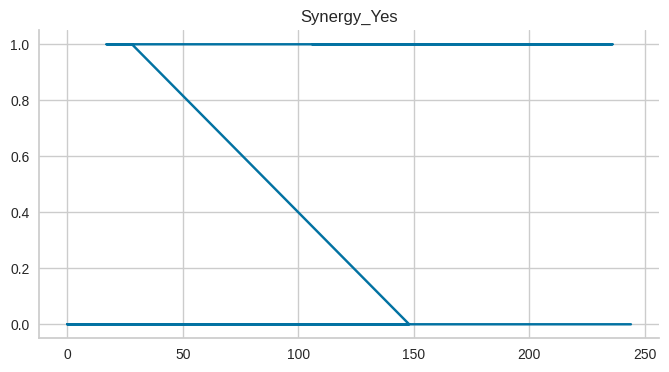

In [62]:
# @title Synergy_Yes

from matplotlib import pyplot as plt
best_combinations['Synergy_Yes'].plot(kind='line', figsize=(8, 4), title='Synergy_Yes')
plt.gca().spines[['top', 'right']].set_visible(False)

In [63]:
df3 = best_combinations

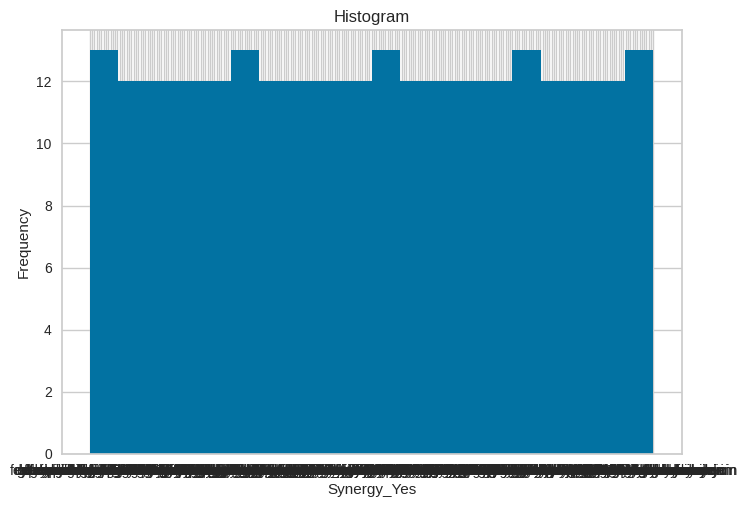

In [65]:
# Histogram of a numeric column
plt.hist(df3['Drug_Combination'], bins=20)
plt.xlabel('Synergy_Yes')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

In [68]:
!pip install pycaret


In [69]:
from pycaret.regression import *

# Initialize PyCaret with your dataset
exp_reg = setup(df2, target='Synergy_Yes')


,Description,Value
0,Session id,6353
1,Target,Synergy_Yes
2,Target type,Regression
3,Original data shape,"(246, 1623)"
4,Transformed data shape,"(246, 1623)"
5,Transformed train set shape,"(172, 1623)"
6,Transformed test set shape,"(74, 1623)"
7,Numeric features,1618
8,Categorical features,4
9,Preprocess,True


In [70]:
best_model = compare_models()


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,0.2652,0.1328,0.3624,0.0496,0.2556,0.7511,2.0950
knn,K Neighbors Regressor,0.2520,0.1418,0.3721,-0.0028,0.2653,0.7600,2.0120
lr,Linear Regression,0.2889,0.1442,0.3773,-0.0234,0.2656,0.8242,2.7480
llar,Lasso Least Angle Regression,0.2882,0.1442,0.3773,-0.0237,0.2654,0.8256,1.8910
dummy,Dummy Regressor,0.2882,0.1442,0.3773,-0.0237,0.2654,0.8256,1.8720
en,Elastic Net,0.2882,0.1442,0.3773,-0.0237,0.2654,0.8256,2.0220
lasso,Lasso Regression,0.2882,0.1442,0.3773,-0.0237,0.2654,0.8256,1.8930
et,Extra Trees Regressor,0.2846,0.1454,0.3789,-0.0333,0.2663,0.8310,2.1510
ridge,Ridge Regression,0.2553,0.1617,0.3995,-0.1809,0.2742,0.6870,1.9290
xgboost,Extreme Gradient Boosting,0.1739,0.1738,0.4125,-0.2148,0.2860,1.0000,2.7140


Processing:   0%|          | 0/81 [00:00<?, ?it/s]